In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import datetime
import numpy as np

In [ ]:
# the survey 0 Consent and Baseline
df0 = pd.read_csv(f'/data/meditation/majid/surveys/0.csv', skiprows=[1,2])
# finished the survey
df0 = df0[df0['Finished']==1]
# sort by end date
df0 = df0.sort_values(by = 'EndDate', ascending = True)
# filter the columns
df0 = df0.rename(columns={'Study ID': 'StudyID'})
df0 = df0.rename(columns={'EndDate': 'date'})
df0 = df0[['StudyID','date']]
df0['date'] = pd.to_datetime(df0['date']).dt.date
df0


In [ ]:
min_dates = df0.groupby('StudyID')['date'].min()
print(len(min_dates))

In [ ]:
# find the first day of each participant
def find_first_day(df):
    first_day = {}
    for StudyID in set(df['StudyID'].tolist()):
        df_target = df[df['StudyID']==StudyID]
        first_day[StudyID] = min(df_target['date'])
    return first_day

In [ ]:
first_day = find_first_day(df0)

In [ ]:
print(len(first_day))

In [ ]:
df_id = pd.read_csv('/home/memari/centering_majid/tables/id.csv')
df_id = df_id.rename(columns={'survey_id': 'StudyID'})

In [ ]:
df_id

In [ ]:
df_group = df_id.merge(df0, on='StudyID', how='left')

In [ ]:
df_group

In [ ]:
grouped = df_group.groupby('date')['StudyID'].nunique()
m = grouped.mean()

In [ ]:
m

In [ ]:
df_group['date']

In [16]:
mylist = df_group['date']
mylist = mylist.dropna()

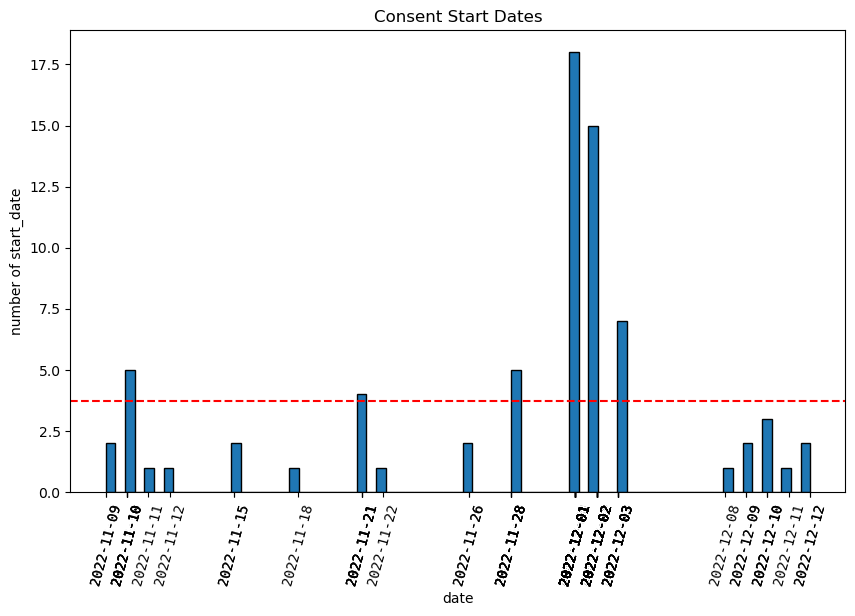

In [19]:
fig = plt.figure(figsize=(10, 6))
plt.hist(mylist,bins=len(mylist),edgecolor='black')
plt.xlabel('date')
plt.ylabel('number of start_date')
plt.title('Consent Start Dates')
plt.xticks(mylist,rotation=75,fontsize=10, fontweight='light', fontfamily='monospace')
plt.axhline(y=m, color='red', linestyle='--')
plt.show()